<tr>
<td style="text-align: center;">
    <div style="display: inline-block;text-align: center">
        <img src="Logo_CentraleSupélec.png" style="width: 30%;">
        <img src="Logo-HeadMind-Partners.png" style="width: 50%;">
    </div>
</td>
</tr>


<h1 style="font-family: Georgia, Arial; font-size: 36px;">News treatment with NLP </h1>
<p style="font-size: 24px;">Infonum Project</p>
<p style="font-size: 24px;"></p>
<p style="font-size: 24px;">Members: Francisco García, Olivia Moyal, Ibrahim Ramdane</p>


This notebook is dedicated to the processing and analysis of news data, focusing on extracting, cleaning, and analyzing news articles to unveil trends and perform sentiment analysis. Our primary objective is to refine raw news content into structured data, facilitating deeper analysis and insights. To achieve this, we will utilize a DataFrame containing news articles and augment it with various metrics, including the similarity of their embeddings to a reference text. 

This augmentation will prove useful for clustering news articles into distinct groups based on their semantic similarities. Additionally, we will incorporate information regarding the presence of specific entities within these texts. With these enriched datasets, we aim to assess the semantic proximity of news articles to a predefined target, such as Apple Inc., thereby providing valuable insights into the discourse surrounding the target entity.


#### Import Librairies

In [1]:
import pickle
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will work with the following pandas DataFrame:

In [2]:
df = pd.read_pickle('df simple - 1 janvier to 7 mars.pkl')

#### First NLP model: Text Embedding with BERT

We delve into the utilization of BERT (Bidirectional Encoder Representations from Transformers) for text embedding, that transforms text data into dense vector representations, capturing semantic meanings and relationships.

We will employ the "bert-base-uncased" model, a widely-used variant of BERT pre-trained on a large corpus of text data. This model has been trained to generate high-quality embeddings for various NLP tasks, including text classification, sentiment analysis, and more.

In [34]:
from transformers import AutoTokenizer, AutoModel
import torch
from scipy.spatial.distance import cosine
import pandas as pd  # Assuming you're using pandas DataFrame for 'df'

tokenizer_bert = AutoTokenizer.from_pretrained("bert-base-uncased")
model_bert = AutoModel.from_pretrained("bert-base-uncased")

In [38]:
def get_embedding(text):
    # Tokenize and convert to input IDs
    inputs = tokenizer_bert(text, return_tensors="pt")

    # Get the embeddings
    with torch.no_grad():
        outputs = model_bert(**inputs)

    # Mean pooling to get one vector per sequence
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings.squeeze()

counting = 0
errors = 0
def get_embedding_of_title(row):
    global counting
    global errors
    try:
        # Get embeddings
        embedding = get_embedding(row['Title'])    
        counting += 1
        if counting % 100 == 0:
            print(counting, end=" ")
        return embedding
    except Exception as e:
        errors += 1
        return None  # Return None to indicate failure

In [ ]:
print(errors)

In [8]:
df['Embedding'] = df.apply(get_embedding_of_title, axis=1)
df_filtered = df.dropna(subset=['Embedding'])


100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 13100 13200 13300 13400 13500 13600 13700 13800 13900 14000 14100 14200 14300 14400 14500 14600 14700 14800 14900 15000 15100 15200 15300 15400 15500 15600 15700 15800 15900 16000 16100 16200 16300 16400 16500 16600 16700 16800 16900 17000 17100 17200 17300 17400 17500 17600 17700 17800 17900 18000 18100 18200 18300 18400 1850

In [12]:
df.to_pickle('df embedding - 1 janvier to 7 mars')

In [2]:
df = pd.read_pickle('df embedding - 1 janvier to 7 mars')

In [3]:
df

,Date,Name,Title,Abstract,Embedding
0,2023-12-31 00:00:00,Hacker News,Cold-blooded software | Hacker News,None,"[tensor(0.2399), tensor(-0.1905), tensor(-0.08..."
1,2023-12-31 00:00:00,ABC News,"Displaced, repatriated and crossing borders: A...",The barren desert plain among the mountains of...,"[tensor(0.1377), tensor(0.1298), tensor(0.0656..."
2,2023-12-31 00:00:00,Buzzfeed,34 Products For Anyone Who Self-Identifies As ...,It's this clever attachable Stanley cup snack ...,"[tensor(-0.0078), tensor(0.0787), tensor(0.162..."
3,2023-12-31 00:00:00,ABC News,Laws banning semi-automatic weapons and librar...,Illinois will usher in 320 new laws on New Yea...,"[tensor(0.0924), tensor(-0.2601), tensor(-0.28..."
4,2023-12-31 00:00:00,ABC News,"After landmark legislation, Indiana Republican...",Indiana's Republican leaders are calling for a...,"[tensor(0.0610), tensor(-0.5290), tensor(0.094..."
...,...,...,...,...,...
8472,2024-03-07,ABC News,Maine mass shooter 'likely' suffered from trau...,"Robert Card, the man who killed 18 in the Lewi...","[tensor(-0.2279), tensor(-0.0601), tensor(-0.1..."
8473,2024-03-07,CBC News,Pedestrian struck and killed on Gardiner Expre...,A pedestrian was struck and killed by a vehicl...,"[tensor(0.0337), tensor(-0.4104), tensor(0.200..."
8474,2024-03-07,CNN,"Single dose of LSD provides immediate, lasting...",One dose of LSD in a clinical trial significan...,"[tensor(-0.1561), tensor(-0.0043), tensor(0.11..."
8475,2024-03-07,BBC News,"World's earliest forest discovered, scientists...",The tree fossils dating back 390 million years...,"[tensor(-0.1308), tensor(0.1301), tensor(0.090..."


#### Second NLP model: Named Entity Recognition (NER)

We employ a state-of-the-art NER model to extract entities from text data. NER identifies and classifies entities within a text, such as names of people, organizations, locations, dates, and more.

For this task, we will utilize the "dslim/bert-large-NER" model, a variant of BERT (Bidirectional Encoder Representations from Transformers) fine-tuned specifically for NER tasks. This model has been pre-trained on a large corpus of text and fine-tuned on labeled NER datasets to accurately recognize entities in various contexts.

In [5]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

tokenizer_ner = AutoTokenizer.from_pretrained("dslim/bert-large-NER")
model_ner = AutoModelForTokenClassification.from_pretrained("dslim/bert-large-NER", force_download=True, resume_download=False)
ner = pipeline("ner", model=model_ner, tokenizer=tokenizer_ner)


config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

c:\Users\Francisco García\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Francisco García\.cache\huggingface\hub\models--dslim--bert-large-NER. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.huggingface.co/dslim/bert-large-NER/81d6a7a3967f136e18bac045a2c8c0ab30f39ae70268129e60255afa21d4205b?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1710448591&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxMDQ0ODU5MX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9kc2xpbS9iZXJ0LWxhcmdlLU5FUi84MWQ2YTdhMzk2N2YxMzZlMThiYWMwNDVhMmM4YzBhYjMwZjM5YWU3MDI2ODEyOWU2MDI1NWFmYTIxZDQyMDViP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiJ9XX0_&Signature=KbHyNWJALfsfj3eQ%7EEvCc5TZMlPu2dB2NMXkBquxr1fOXbukcQX1lgGUD8QFyh4-%7EYrJHuvzKw1-Huxl3PT23m4Zj0q7BJaJvoFkgyvqnL9QEx0zvtR08YOFoXv0TRWrzjxHtRFYglYhT1Z4r0GhxyRQM9yG8Gio7TpbeU1QwHiHFmzyie%7E6eEIB7f%7E61LKtJ9QWhzkmgGBKNdHUoxHvAX0ctQfIXKQY9ywur7KzJkDYItoJa5SevXZNeBa85nO7Ys6CMVNVjeSZD-DWx2sStWqt5AQdZaAF-QjhCopcuslC2iMlf82y45boCBtmtnCbizYbB2fJBM-Uxfy5V0-vkQ__&Key-Pair-Id=KVTP0A1DKRT

model.safetensors:  44%|####4     | 587M/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-large-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
example = "Discover the iPhone XR 2019 in this 360° video rendering"
ner_results = ner(example)
print(ner_results)

[{'entity': 'B-MISC', 'score': 0.997329, 'index': 4, 'word': 'iPhone', 'start': 13, 'end': 19}, {'entity': 'I-MISC', 'score': 0.99431026, 'index': 5, 'word': 'X', 'start': 20, 'end': 21}, {'entity': 'I-MISC', 'score': 0.99741423, 'index': 6, 'word': '##R', 'start': 21, 'end': 22}, {'entity': 'I-MISC', 'score': 0.9688579, 'index': 7, 'word': '2019', 'start': 23, 'end': 27}]


In [7]:
counter_entity = 0
def get_entity(row, word='Apple'):
    try:
        global counter_entity
        counter_entity += 1
        if counter_entity % 1000 == 0:
            print(".",end="")
        ner_results = ner(row["Title"])
        has_apple_entity = any(entity['word'] == word and entity['entity'] == 'B-ORG' for entity in ner_results)
        if has_apple_entity:
            for entity in ner_results:
                if entity['word'] == word:
                    return entity['score']
        return 0
    except ValueError as e:
        return 0

In [8]:
df['Entity'] = df.apply(get_entity, axis=1)

.........................

In [9]:
df

,Date,Name,Title,Abstract,Embedding,Entity
0,2023-12-31 00:00:00,Hacker News,Cold-blooded software | Hacker News,None,"[tensor(0.2399), tensor(-0.1905), tensor(-0.08...",0.0
1,2023-12-31 00:00:00,ABC News,"Displaced, repatriated and crossing borders: A...",The barren desert plain among the mountains of...,"[tensor(0.1377), tensor(0.1298), tensor(0.0656...",0.0
2,2023-12-31 00:00:00,Buzzfeed,34 Products For Anyone Who Self-Identifies As ...,It's this clever attachable Stanley cup snack ...,"[tensor(-0.0078), tensor(0.0787), tensor(0.162...",0.0
3,2023-12-31 00:00:00,ABC News,Laws banning semi-automatic weapons and librar...,Illinois will usher in 320 new laws on New Yea...,"[tensor(0.0924), tensor(-0.2601), tensor(-0.28...",0.0
4,2023-12-31 00:00:00,ABC News,"After landmark legislation, Indiana Republican...",Indiana's Republican leaders are calling for a...,"[tensor(0.0610), tensor(-0.5290), tensor(0.094...",0.0
...,...,...,...,...,...,...
8472,2024-03-07,ABC News,Maine mass shooter 'likely' suffered from trau...,"Robert Card, the man who killed 18 in the Lewi...","[tensor(-0.2279), tensor(-0.0601), tensor(-0.1...",0.0
8473,2024-03-07,CBC News,Pedestrian struck and killed on Gardiner Expre...,A pedestrian was struck and killed by a vehicl...,"[tensor(0.0337), tensor(-0.4104), tensor(0.200...",0.0
8474,2024-03-07,CNN,"Single dose of LSD provides immediate, lasting...",One dose of LSD in a clinical trial significan...,"[tensor(-0.1561), tensor(-0.0043), tensor(0.11...",0.0
8475,2024-03-07,BBC News,"World's earliest forest discovered, scientists...",The tree fossils dating back 390 million years...,"[tensor(-0.1308), tensor(0.1301), tensor(0.090...",0.0


In [10]:
# make that df gives the quantity of entities that are = 1
# make that df gives the quantity of entities that are = 0

df['Entity'].value_counts()

0.000000    25109
0.881936        4
0.557219        4
0.987551        3
0.963524        3
            ...  
0.997449        1
0.991939        1
0.985825        1
0.996779        1
0.994468        1
Name: Entity, Length: 157, dtype: int64

In [11]:
len(df)

25278

Analysis of null elements and some minor transformation

In [ ]:
# count NoneType in Embedding
df['Embedding'].isnull().sum()

In [ ]:
# delete NoneType in Embedding
df = df.dropna(subset=['Embedding'])

In [17]:
def tensor_to_np(tensor):
    return tensor.numpy()
df['Embedding'] = df['Embedding'].apply(tensor_to_np)

2

In [12]:
df.to_pickle('df embedding and entity- 1 janvier to 7 mars')

In [13]:
df = pd.read_pickle('df embedding and entity- 1 janvier to 7 mars')

#### Third NLP model: Sentiment Analysis with Transformers

We introduce a tool for sentiment analysis leveraging transformer-based models. Sentiment analysis aims to determine the sentiment or emotion expressed in a piece of text, such as positive, negative, or neutral.

For our sentiment analysis task, we will utilize the pipeline function from the transformers library, enabling us to quickly deploy a pre-trained sentiment analysis model with minimal code. The model used by default in this pipeline is well-suited for sentiment analysis tasks and has been fine-tuned on large sentiment analysis datasets to accurately predict the sentiment of input text.

In [ ]:
# from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

# sentiment_analyzer = pipeline("sentiment-analysis")

In [ ]:
# Usar el de sentimientos buenos neutral y malo
# def get_sentiment_score(row):
#     title = row["Title"] if row["Title"] else ""
    
#     # Check if the text is not empty
#     if title:
#         result = sentiment_analyzer(title)[0]
#         score = result['score']
#         return score if result['label'] == 'POSITIVE' else -score
#     else:
#         return 0.0  

In [ ]:
# counter = 0
# def embedding_of_title(row):
#     global counter
#     counter += 1
#     if counter % 1000 == 0:
#         print(".",end="")
#     return get_embedding(row['Title']).numpy()  
# def embedding_of_abstract(row):
#     global counter
#     counter += 1
#     if counter % 1000 == 0:
#         print(".",end="")
#     return get_embedding(row['Abstract']).numpy()  

#### Clustering Analysis with KMeans

In this section, we will delve into the process of clustering using the KMeans algorithm. Clustering is a fundamental unsupervised learning technique that aims to group similar data points together into clusters, thereby revealing underlying patterns and structures within the data.

We will utilize the `KMeans` algorithm from the `sklearn.cluster` module to partition our data into distinct clusters. This algorithm requires the number of clusters (`K`) as a hyperparameter, which we will determine using an elbow method.


To determine Optimal Number of Clusters (K), we will employ the elbow method to determine the optimal number of clusters (`K`). This method involves running the KMeans algorithm for different values of `K` and plotting the within-cluster sum of squared distances (inertia) against `K`. The point where the inertia starts to decrease at a slower rate indicates the optimal number of clusters.


By following these steps, we will be able to identify meaningful clusters within our data, providing valuable insights into the underlying structure and relationships within the text embeddings.

In [20]:
from sklearn.cluster import KMeans

# Concatenate the arrays from the 'embedding' column
data = np.concatenate(df['Embedding'].values)

# Reshape the data to have shape (n_samples, n_features)
# Since each embedding has 768 features, and there are multiple embeddings,
# we reshape it to (-1, 768)
data = data.reshape(-1, 768)

In [21]:
import math
infinito = math.inf

In [22]:
Sum_of_squared_distances = []
K = range(15,30)
better_models = list()
for k in K:
    print(".",end="")
    smallest_inertia = infinito
    km_final = None
    # range depende de K
    for i in range(10):
        km = KMeans(n_clusters=k)
        km = km.fit(data)
        if km.inertia_ <= smallest_inertia:
            smallest_inertia = km.inertia_
            km_final = km
    better_models.append(km_final)
    Sum_of_squared_distances.append(km_final.inertia_)

...............

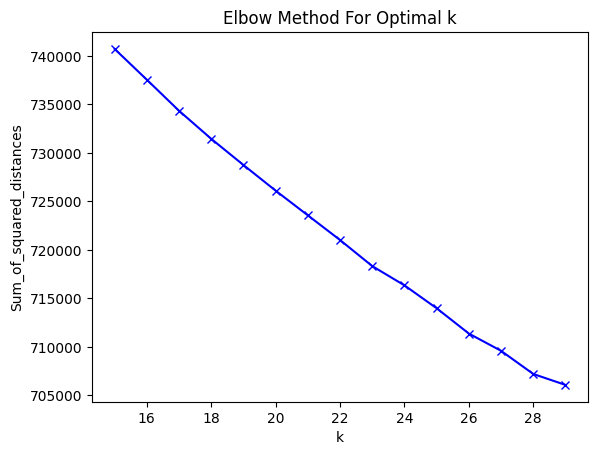

In [23]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [25]:
best_model = better_models[25-15]
best_model

KMeans(n_clusters=25)

In [26]:
df['Cluster'] = best_model.labels_.tolist()

In [27]:
df

,Date,Name,Title,Abstract,Embedding,Entity,Cluster
0,2023-12-31 00:00:00,Hacker News,Cold-blooded software | Hacker News,None,"[0.2399339, -0.19047374, -0.08786014, 0.028991...",0.0,8
1,2023-12-31 00:00:00,ABC News,"Displaced, repatriated and crossing borders: A...",The barren desert plain among the mountains of...,"[0.13767257, 0.12975843, 0.06555537, 0.0827153...",0.0,6
2,2023-12-31 00:00:00,Buzzfeed,34 Products For Anyone Who Self-Identifies As ...,It's this clever attachable Stanley cup snack ...,"[-0.007809721, 0.07871487, 0.16217521, -0.1808...",0.0,21
3,2023-12-31 00:00:00,ABC News,Laws banning semi-automatic weapons and librar...,Illinois will usher in 320 new laws on New Yea...,"[0.09242323, -0.26005897, -0.2887374, -0.12380...",0.0,7
4,2023-12-31 00:00:00,ABC News,"After landmark legislation, Indiana Republican...",Indiana's Republican leaders are calling for a...,"[0.06100006, -0.529024, 0.09432596, -0.147633,...",0.0,7
...,...,...,...,...,...,...,...
8472,2024-03-07,ABC News,Maine mass shooter 'likely' suffered from trau...,"Robert Card, the man who killed 18 in the Lewi...","[-0.2279381, -0.060110323, -0.10384234, -0.172...",0.0,4
8473,2024-03-07,CBC News,Pedestrian struck and killed on Gardiner Expre...,A pedestrian was struck and killed by a vehicl...,"[0.033664487, -0.41040722, 0.20053227, 0.06452...",0.0,4
8474,2024-03-07,CNN,"Single dose of LSD provides immediate, lasting...",One dose of LSD in a clinical trial significan...,"[-0.15608352, -0.0043046027, 0.11045892, -0.09...",0.0,1
8475,2024-03-07,BBC News,"World's earliest forest discovered, scientists...",The tree fossils dating back 390 million years...,"[-0.13077906, 0.13013381, 0.09061687, -0.08378...",0.0,19


In [28]:
df.to_pickle('df embedding and entity and cluster- 1 janvier to 7 mars')

In [29]:
df = pd.read_pickle('df embedding and entity and cluster- 1 janvier to 7 mars')

#### Column `Similar`
To augment our DataFrame (`df`) with a "Similar" column, we utilize the `similarity_to_0` function. This function computes the cosine similarity between each embedding in the "Embedding" column and a reference embedding (Here it is the description of Apple Inc. that is in Wikipedia). The resulting similarity scores, ranging from 0 to 1, are then stored in the "Similar" column. This enables quick assessment of semantic similarity between text embeddings and the reference embedding, aiding subsequent analysis and interpretation.

In [34]:
ref_apple = """Apple Inc. (formerly Apple Computer, Inc.) is an American multinational technology company headquartered\
in Cupertino, California, in Silicon Valley. It designs, develops, and sells consumer electronics, computer\
software, and online services. Devices include the iPhone, iPad, Mac, Apple Watch, and Apple TV; operating\
systems include iOS and macOS; and software applications and services include iTunes, iCloud, and Apple Music\
"""
embedding_ref = get_embedding(ref_apple)

In [35]:
from scipy.spatial.distance import cosine
def similarity_to_0(row):
    global embedding_ref
    return 1 - cosine(row['Embedding'], embedding_ref)

In [36]:
df['Similarity'] = df.apply(similarity_to_0, axis=1)

In [37]:
df

,Date,Name,Title,Abstract,Embedding,Entity,Cluster,Similarity
0,2023-12-31 00:00:00,Hacker News,Cold-blooded software | Hacker News,None,"[0.2399339, -0.19047374, -0.08786014, 0.028991...",0.0,8,0.574462
1,2023-12-31 00:00:00,ABC News,"Displaced, repatriated and crossing borders: A...",The barren desert plain among the mountains of...,"[0.13767257, 0.12975843, 0.06555537, 0.0827153...",0.0,6,0.574035
2,2023-12-31 00:00:00,Buzzfeed,34 Products For Anyone Who Self-Identifies As ...,It's this clever attachable Stanley cup snack ...,"[-0.007809721, 0.07871487, 0.16217521, -0.1808...",0.0,21,0.618445
3,2023-12-31 00:00:00,ABC News,Laws banning semi-automatic weapons and librar...,Illinois will usher in 320 new laws on New Yea...,"[0.09242323, -0.26005897, -0.2887374, -0.12380...",0.0,7,0.574722
4,2023-12-31 00:00:00,ABC News,"After landmark legislation, Indiana Republican...",Indiana's Republican leaders are calling for a...,"[0.06100006, -0.529024, 0.09432596, -0.147633,...",0.0,7,0.488754
...,...,...,...,...,...,...,...,...
8472,2024-03-07,ABC News,Maine mass shooter 'likely' suffered from trau...,"Robert Card, the man who killed 18 in the Lewi...","[-0.2279381, -0.060110323, -0.10384234, -0.172...",0.0,4,0.489876
8473,2024-03-07,CBC News,Pedestrian struck and killed on Gardiner Expre...,A pedestrian was struck and killed by a vehicl...,"[0.033664487, -0.41040722, 0.20053227, 0.06452...",0.0,4,0.477289
8474,2024-03-07,CNN,"Single dose of LSD provides immediate, lasting...",One dose of LSD in a clinical trial significan...,"[-0.15608352, -0.0043046027, 0.11045892, -0.09...",0.0,1,0.553005
8475,2024-03-07,BBC News,"World's earliest forest discovered, scientists...",The tree fossils dating back 390 million years...,"[-0.13077906, 0.13013381, 0.09061687, -0.08378...",0.0,19,0.547306


In [38]:
df.to_pickle('df embedding and entity and cluster and similarity- 1 janvier to 7 mars')

In [2]:
df = pd.read_pickle('df embedding and entity and cluster and similarity- 1 janvier to 7 mars')